# Intraindividual diversity

### 1. Tooth by tooth diversity

We want to see if there are patterns of microbial diversity in the same individual (and same tooth type) that might be indicative of HIV status. Also, what level of variation might we expect tooth to tooth from same individual?

pdf 
  2

pdf 
  2

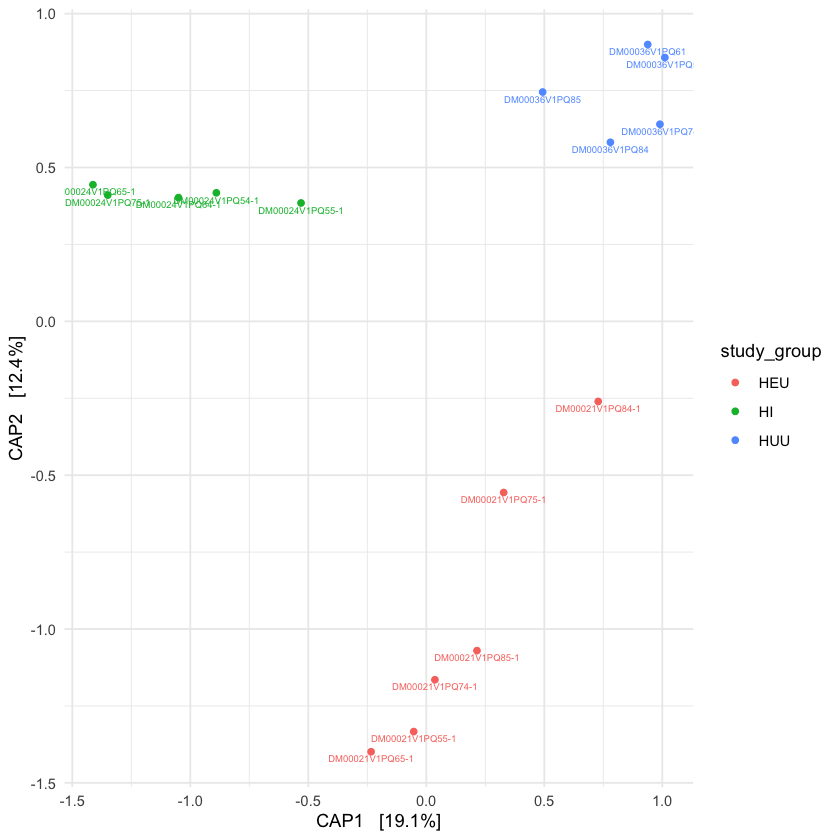

pdf 
  2

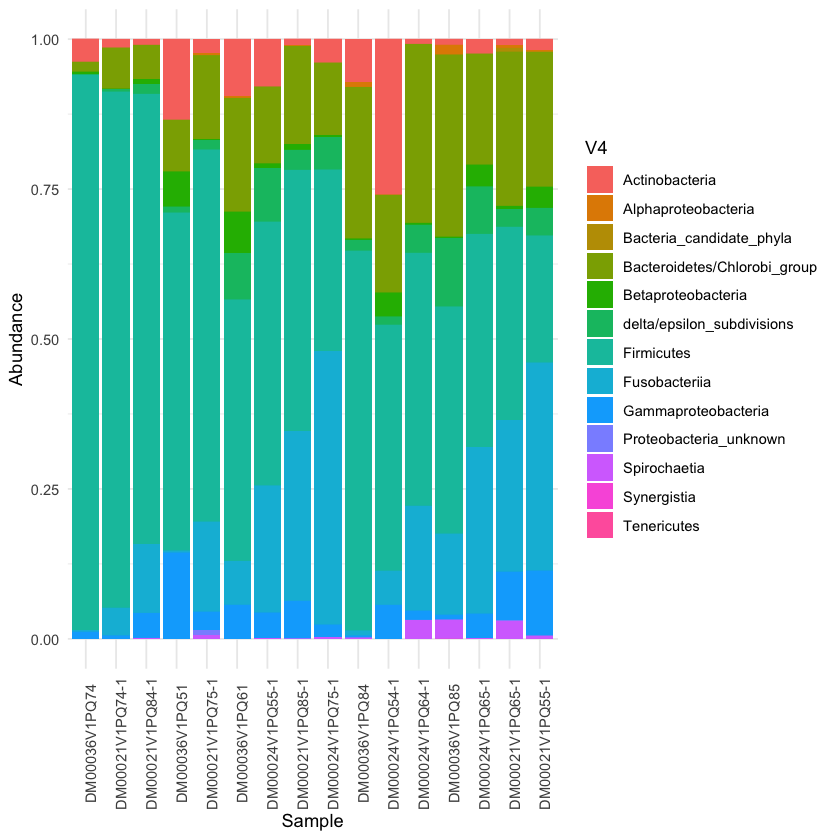

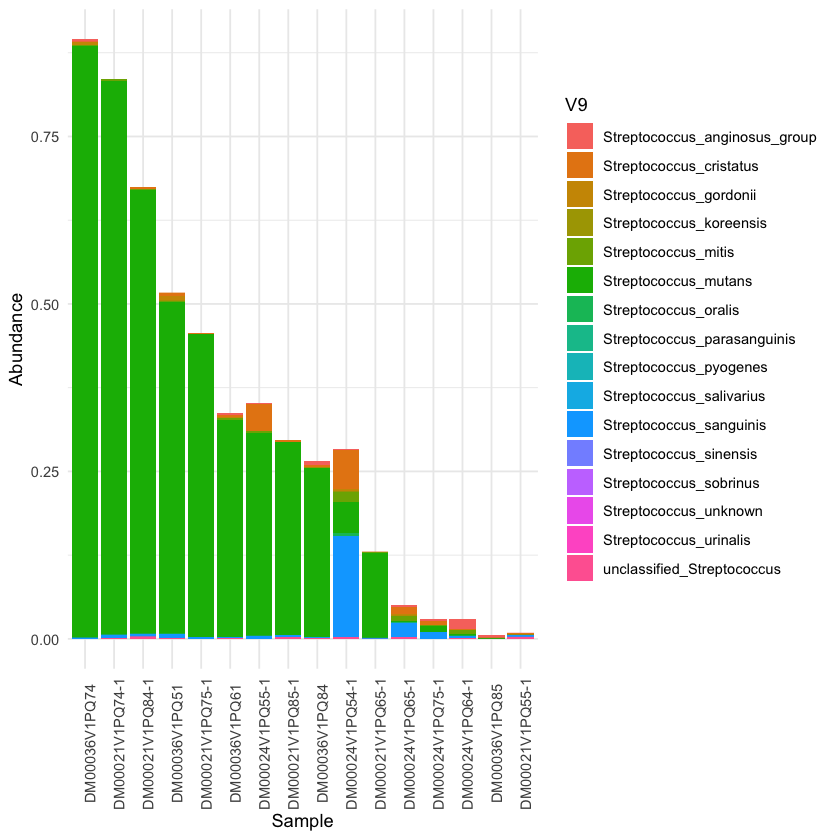

In [1]:
library(phyloseq)
library(ggplot2)
# First need to filter out our samples from the larger phyloseq object
load(".RData")
sub.ps.dat <- subset_samples(ps.dat.noUS, study_id == "DM00021" | study_id == "DM00036" | study_id == "DM00024")
sub.ps.dat <- subset_samples(sub.ps.dat, aliquot_type == "CA-PD")
sample_data(sub.ps.dat)['manifest_id'] <- row.names(sample_data(sub.ps.dat))

# ordinate and plot
ordcap <- ordinate(sub.ps.dat, "CAP", "bray", ~study_group)
pdf("img/intraindividual_div.capscale_plt.pdf")
plot_ordination(sub.ps.dat, ordcap, "samples", color="study_group", label="manifest_id") + theme_minimal()
dev.off()
plot_ordination(sub.ps.dat, ordcap, "samples", color="study_group", label="manifest_id") + theme_minimal()

# taxonomy plot
# first need to get relative abundance normalized data
rel.abund <- transform_sample_counts(sub.ps.dat, function(x) x/sum(x))
glom <- tax_glom(rel.abund, taxrank=rank_names(rel.abund)[8]) # collapse 
data <- psmelt(glom) # create dataframe from phyloseq object
data$Sample <- factor(data$Sample, levels=unique(data$Sample))
pdf("img/intraindividual_div.taxbar.pdf")
ggplot(data, aes(x=Sample, y=Abundance, fill=V4)) + geom_bar(aes(), stat="identity", position="stack") + theme_minimal() + theme(axis.text.x = element_text(angle = 90))
dev.off()
ggplot(data, aes(x=Sample, y=Abundance, fill=V4)) + geom_bar(aes(), stat="identity", position="stack") + theme_minimal() + theme(axis.text.x = element_text(angle = 90))
                                     
# streptococcus only 
strep.dat <- subset_taxa(rel.abund, V8 == "Streptococcus")
glom <- tax_glom(strep.dat, taxrank=rank_names(strep.dat)[9]) # collapse 
data <- psmelt(glom) # create dataframe from phyloseq object
data$Sample <- factor(data$Sample, levels=unique(data$Sample))
pdf("img/intraindividual_div.streptaxbar.pdf")
ggplot(data, aes(x=Sample, y=Abundance, fill=V9)) + geom_bar(aes(), stat="identity", position="stack") + theme_minimal() + theme(axis.text.x = element_text(angle = 90))
dev.off()
ggplot(data, aes(x=Sample, y=Abundance, fill=V9)) + geom_bar(aes(), stat="identity", position="stack") + theme_minimal() + theme(axis.text.x = element_text(angle = 90))

What if we just look at all CA-PD samples, split by HIV status, and strep abundance?

pdf 
  2

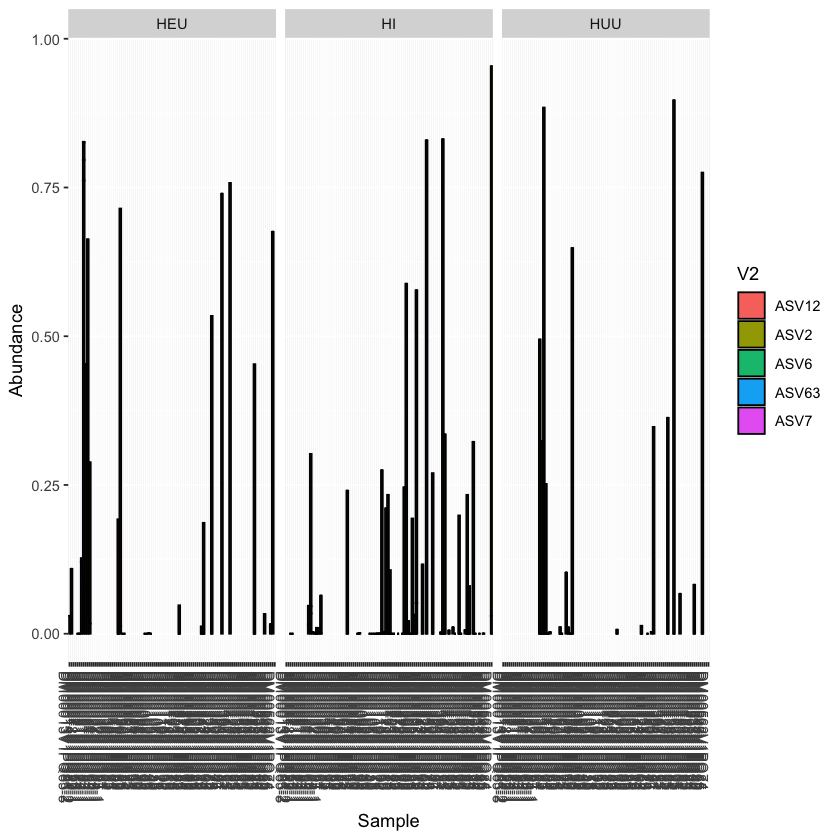

In [2]:
capd <- subset_samples(ps.dat.noUS, aliquot_type == 'CA-PD')
rel.abund <- transform_sample_counts(capd, function(x) x/sum(x))
strep.dat <- subset_taxa(rel.abund, V9 == "Streptococcus_mutans")
# need to add asv to taxon table so we can color by it
tax_table(strep.dat)[,1] <- row.names(tax_table(strep.dat))
pdf("img/capd.streptaxbar.pdf")
plot_bar(strep.dat, fill="V2") + facet_grid(~study_group)
dev.off()
plot_bar(strep.dat, fill="V2") + facet_grid(~study_group)

Lots of diversity re: abundance of S. mutans but hard to see with so many samples, group by HIV status

In [3]:
# function to summarize data
data_summary <- function(data, varname, groupnames){
  require(plyr)
  summary_func <- function(x, col){
    c(mean = mean(x[[col]], na.rm=TRUE),
      sd = sd(x[[col]], na.rm=TRUE))
  }
  data_sum<-ddply(data, groupnames, .fun=summary_func,
                  varname)
  data_sum <- rename(data_sum, c("mean" = varname))
 return(data_sum)
}

CA-PD

Loading required package: plyr



pdf 
  2

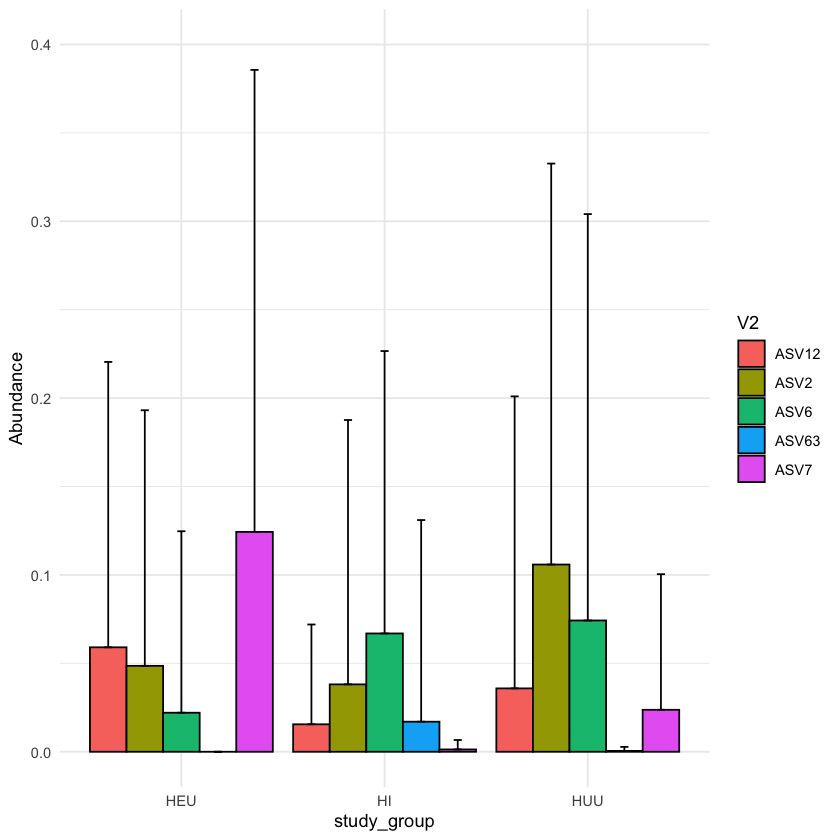

In [4]:
# CA-PD
capd <- subset_samples(ps.dat.noUS, aliquot_type == 'CA-PD')
rel.abund <- transform_sample_counts(capd, function(x) x/sum(x))
strep.dat <- subset_taxa(rel.abund, V9 == "Streptococcus_mutans")
# need to add asv to taxon table so we can color by it
tax_table(strep.dat)[,1] <- row.names(tax_table(strep.dat))
# get dataframe from phyloseq object
df <- psmelt(strep.dat)
df <- data_summary(df, varname="Abundance", groupnames=c("study_group", "V2"))

# plot
ggplot(df, aes(x=study_group, y=Abundance, fill=V2)) +
  geom_bar(stat="identity", color="black",
           position=position_dodge()) +
  geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
                 position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4))
pdf("img/capd_streptaxbar.pdf")
ggplot(df, aes(x=study_group, y=Abundance, fill=V2)) +
  geom_bar(stat="identity", color="black",
           position=position_dodge()) +
  geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
                 position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4))
dev.off()

CA-PE

pdf 
  2

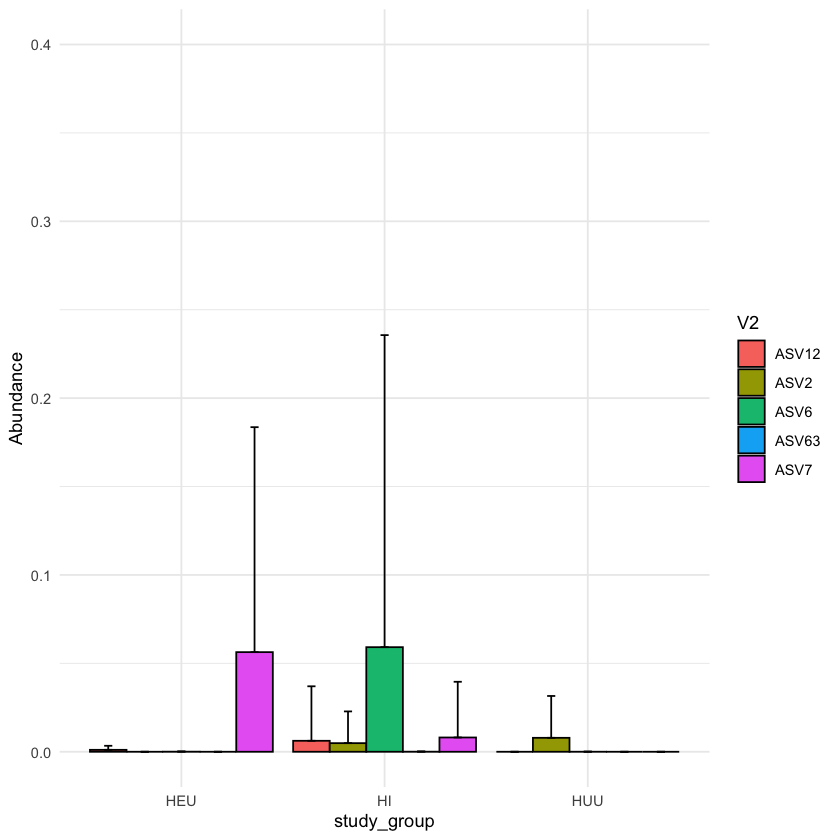

In [5]:
# CA-PE
cape <- subset_samples(ps.dat.noUS, aliquot_type == 'CA-PE')
rel.abund <- transform_sample_counts(cape, function(x) x/sum(x))
strep.dat <- subset_taxa(rel.abund, V9 == "Streptococcus_mutans")
# need to add asv to taxon table so we can color by it
tax_table(strep.dat)[,1] <- row.names(tax_table(strep.dat))
# get dataframe from phyloseq object
df <- psmelt(strep.dat)
df <- data_summary(df, varname="Abundance", groupnames=c("study_group", "V2"))

# plot
ggplot(df, aes(x=study_group, y=Abundance, fill=V2)) +
  geom_bar(stat="identity", color="black",
           position=position_dodge()) +
  geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
                 position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4))
pdf("img/cape_streptaxbar.pdf")
ggplot(df, aes(x=study_group, y=Abundance, fill=V2)) +
  geom_bar(stat="identity", color="black",
           position=position_dodge()) +
  geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
                 position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4))
dev.off()

CA-PF

pdf 
  2

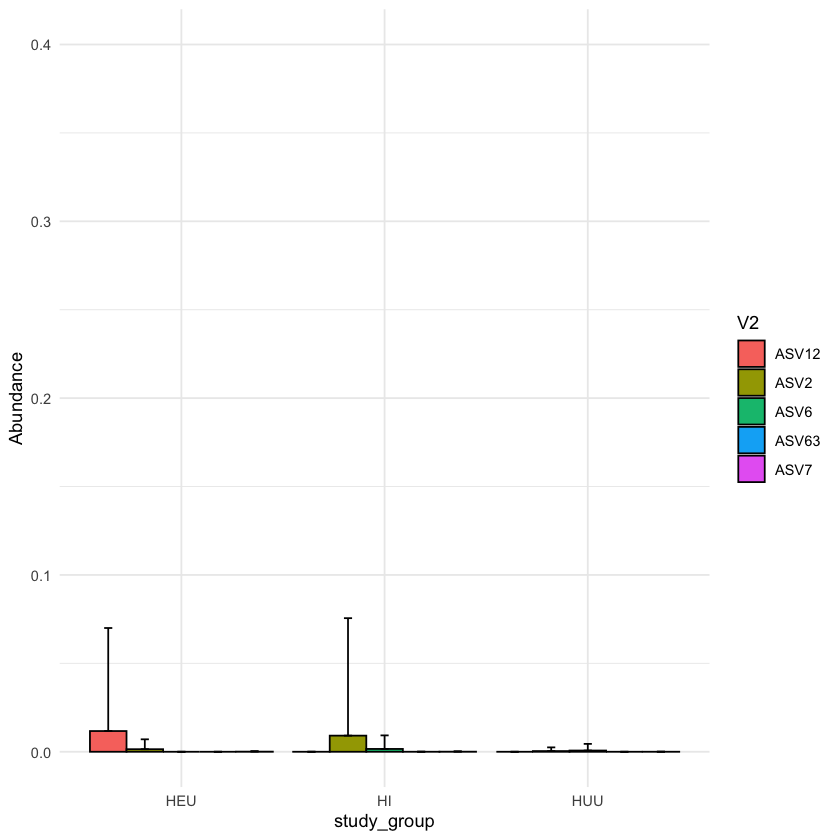

In [6]:
# CA-PF
capf <- subset_samples(ps.dat.noUS, aliquot_type == 'CA-PF')
rel.abund <- transform_sample_counts(capf, function(x) x/sum(x))
strep.dat <- subset_taxa(rel.abund, V9 == "Streptococcus_mutans")
# need to add asv to taxon table so we can color by it
tax_table(strep.dat)[,1] <- row.names(tax_table(strep.dat))
# get dataframe from phyloseq object
df <- psmelt(strep.dat)
df <- data_summary(df, varname="Abundance", groupnames=c("study_group", "V2"))

# plot
ggplot(df, aes(x=study_group, y=Abundance, fill=V2)) +
  geom_bar(stat="identity", color="black",
           position=position_dodge()) +
  geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
                 position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4))
pdf("img/capf_streptaxbar.pdf")
ggplot(df, aes(x=study_group, y=Abundance, fill=V2)) +
  geom_bar(stat="identity", color="black",
           position=position_dodge()) +
  geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
                 position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4))
dev.off()

CAE-PE

pdf 
  2

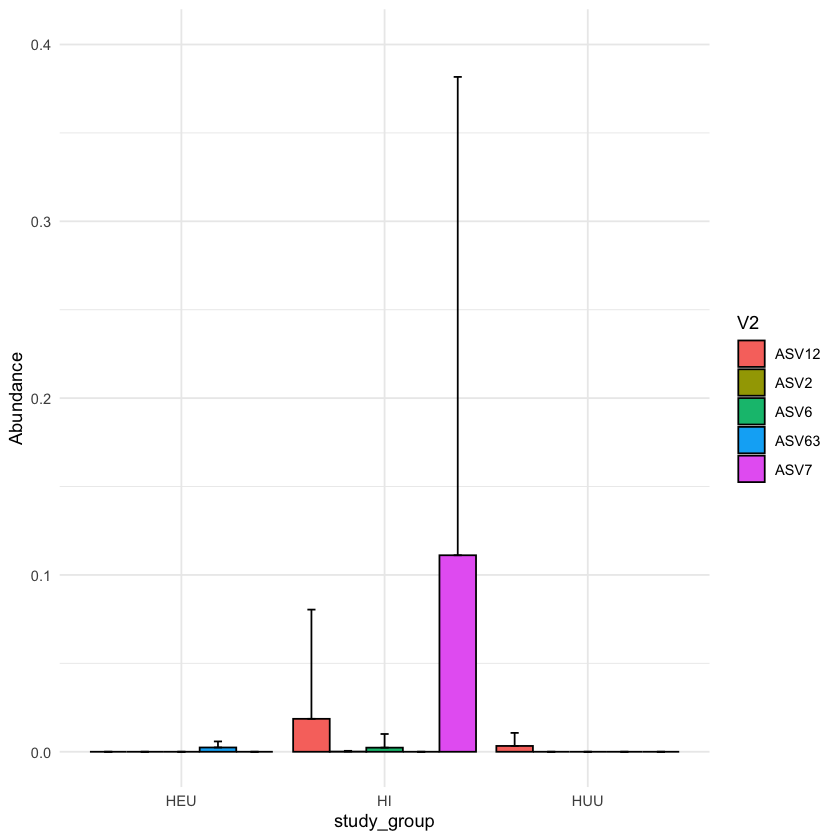

In [7]:
# CAE-PE
caepe <- subset_samples(ps.dat.noUS, aliquot_type == 'CAE-PE')
rel.abund <- transform_sample_counts(caepe, function(x) x/sum(x))
strep.dat <- subset_taxa(rel.abund, V9 == "Streptococcus_mutans")
# need to add asv to taxon table so we can color by it
tax_table(strep.dat)[,1] <- row.names(tax_table(strep.dat))
# get dataframe from phyloseq object
df <- psmelt(strep.dat)
df <- data_summary(df, varname="Abundance", groupnames=c("study_group", "V2"))

# plot
ggplot(df, aes(x=study_group, y=Abundance, fill=V2)) +
  geom_bar(stat="identity", color="black",
           position=position_dodge()) +
  geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
                 position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4))
pdf("img/caepe_streptaxbar.pdf")
ggplot(df, aes(x=study_group, y=Abundance, fill=V2)) +
  geom_bar(stat="identity", color="black",
           position=position_dodge()) +
  geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
                 position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4))
dev.off()

CAE-PF

pdf 
  2

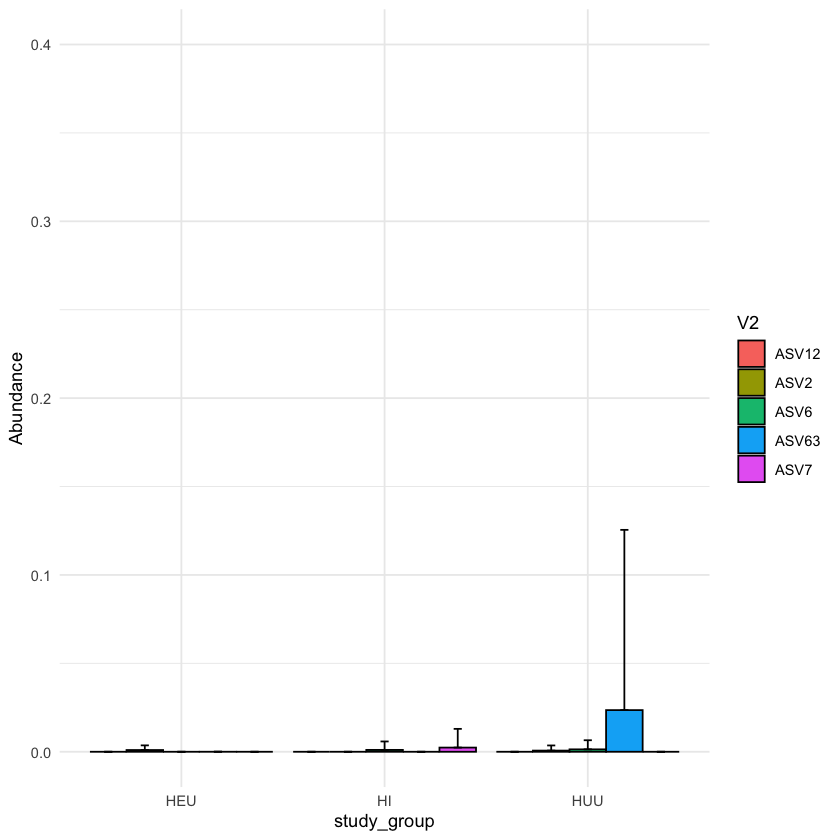

In [8]:
# CAE-PF
caepf <- subset_samples(ps.dat.noUS, aliquot_type == 'CAE-PF')
rel.abund <- transform_sample_counts(caepf, function(x) x/sum(x))
strep.dat <- subset_taxa(rel.abund, V9 == "Streptococcus_mutans")
# need to add asv to taxon table so we can color by it
tax_table(strep.dat)[,1] <- row.names(tax_table(strep.dat))
# get dataframe from phyloseq object
df <- psmelt(strep.dat)
df <- data_summary(df, varname="Abundance", groupnames=c("study_group", "V2"))

# plot
ggplot(df, aes(x=study_group, y=Abundance, fill=V2)) +
  geom_bar(stat="identity", color="black",
           position=position_dodge()) +
  geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
                 position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4))
pdf("img/caepf_streptaxbar.pdf")
ggplot(df, aes(x=study_group, y=Abundance, fill=V2)) +
  geom_bar(stat="identity", color="black",
           position=position_dodge()) +
  geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
                 position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4))
dev.off()

CF-PF

pdf 
  2

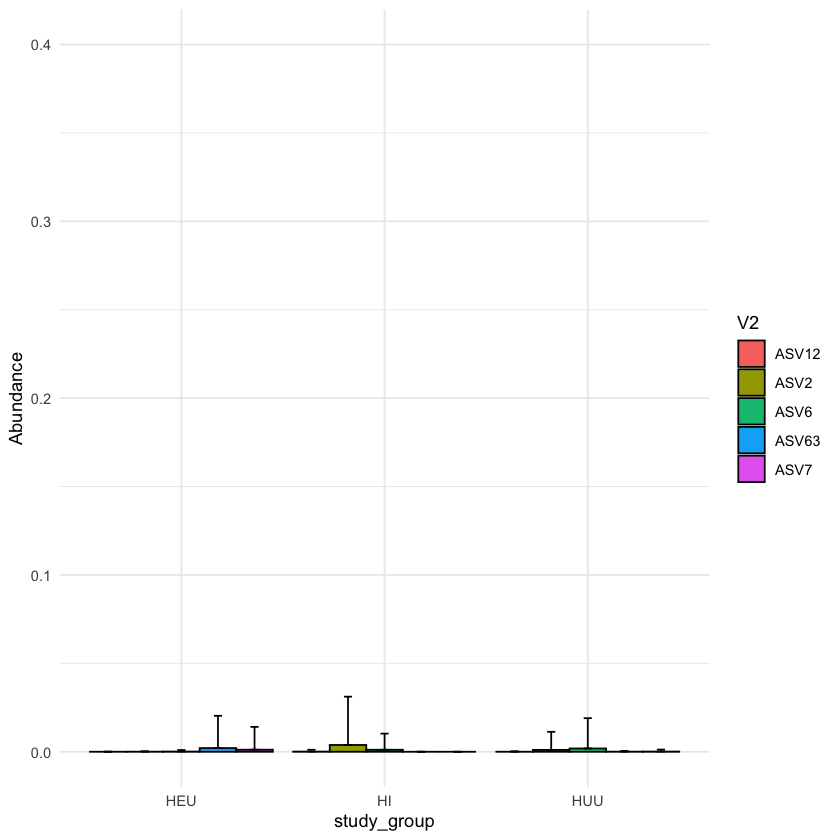

In [9]:
# CF-PF
cfpf <- subset_samples(ps.dat.noUS, aliquot_type == 'CF-PF')
rel.abund <- transform_sample_counts(cfpf, function(x) x/sum(x))
strep.dat <- subset_taxa(rel.abund, V9 == "Streptococcus_mutans")
# need to add asv to taxon table so we can color by it
tax_table(strep.dat)[,1] <- row.names(tax_table(strep.dat))
# get dataframe from phyloseq object
df <- psmelt(strep.dat)
df <- data_summary(df, varname="Abundance", groupnames=c("study_group", "V2"))

# plot
ggplot(df, aes(x=study_group, y=Abundance, fill=V2)) +
  geom_bar(stat="identity", color="black",
           position=position_dodge()) +
  geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
                 position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4))
pdf("img/cfpf_streptaxbar.pdf")
ggplot(df, aes(x=study_group, y=Abundance, fill=V2)) +
  geom_bar(stat="identity", color="black",
           position=position_dodge()) +
  geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
                 position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4))
dev.off()